In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplt

In [2]:
data = pd.read_csv("/Users/hardik/Documents/Semester5/3. Data Mining/marketing_campaign.csv",sep="\t")

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [8]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
data['Education'] = en.fit_transform(data['Education'])
data['Marital_Status'] = en.fit_transform(data['Marital_Status'])

In [9]:
X = data.drop(['ID','Dt_Customer','Year_Birth','Income'],axis=1)

In [10]:
X

,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,2,4,0,0,58,635,88,546,172,88,...,7,0,0,0,0,0,0,3,11,1
1,2,4,1,1,38,11,1,6,2,1,...,5,0,0,0,0,0,0,3,11,0
2,2,5,0,0,26,426,49,127,111,21,...,4,0,0,0,0,0,0,3,11,0
3,2,5,1,0,26,11,4,20,10,3,...,6,0,0,0,0,0,0,3,11,0
4,4,3,1,0,94,173,43,118,46,27,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,0,1,46,709,43,182,42,118,...,5,0,0,0,0,0,0,3,11,0
2236,4,5,2,1,56,406,0,30,0,0,...,7,0,0,0,1,0,0,3,11,0
2237,2,2,0,0,91,908,48,217,32,12,...,6,0,1,0,0,0,0,3,11,0
2238,3,5,0,1,8,428,30,214,80,30,...,3,0,0,0,0,0,0,3,11,0


In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_new= pca.fit_transform(X)

In [12]:
pca.explained_variance_ratio_

array([0.78670162, 0.17131753])

In [21]:
pca.explained_variance_ratio_

array([0.78670162, 0.17131753])

Text(0, 0.5, 'Euclidean Dist')

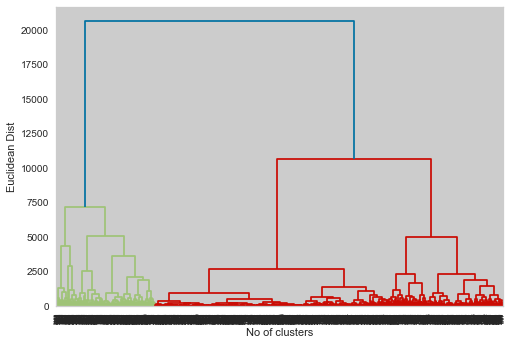

In [40]:
# Agglomerative Clustering 
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch 
dendogram = sch.dendrogram(sch.linkage(X,method='ward'))
pyplt.xlabel('No of clusters')
pyplt.ylabel('Euclidean Dist')

In [46]:
model = AgglomerativeClustering(n_clusters=9)
from sklearn.metrics import silhouette_score
y = model.fit_predict(X)
silhouette_score(X,y)

0.47533468978777255

Text(0, 0.5, 'Euclidean Dist')

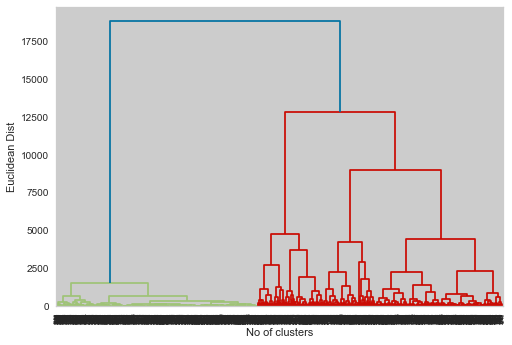

In [22]:
# Agglomerative Clustering with PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch 
dendogram = sch.dendrogram(sch.linkage(x_new,method='ward'))
pyplt.xlabel('No of clusters')
pyplt.ylabel('Euclidean Dist')

In [39]:
model = AgglomerativeClustering(n_clusters=10)
from sklearn.metrics import silhouette_score
y = model.fit_predict(x_new)
silhouette_score(x_new,y)

0.5178759835839064